In [2]:
%pip install tensorflow
%pip install matplotlib


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [8]:
def f(x):
    return (x + 1) ** 2 * (x - 1)


train_dataset = tf.data.Dataset.range(100).map(
    lambda x: (x, f(x))).batch(2)
test_dataset = tf.data.Dataset.range(100, 200).map(
    lambda x: (x, f(x))).batch(2)

model = keras.models.Sequential([
    keras.layers.Dense(20, input_shape=(1,), activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_dataset, epochs=3)
model.evaluate(test_dataset)

Epoch 1/3
50/50 [==============================] - 0s 1ms/step - loss: 141131579392.0000 - mae: 248274.1406
Epoch 2/3
50/50 [==============================] - 0s 1ms/step - loss: 141125025792.0000 - mae: 248264.1250
Epoch 3/3
50/50 [==============================] - 0s 1ms/step - loss: 18035660292096.0000 - mae: 3738104.2500


[18035660292096.0, 3738104.25]

4/4 [==============================] - 0s 1ms/step


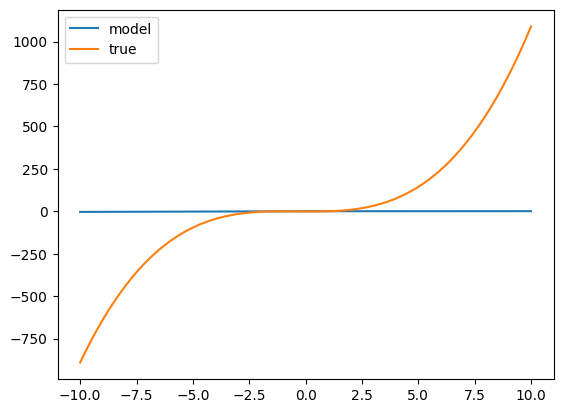

In [9]:
x = tf.linspace(-10., 10., 100)
y = model.predict(x)
z = f(x)

plt.plot(x, y, label='model')
plt.plot(x, z, label='true')
plt.legend()
plt.show()